In [1]:
import numpy as np
import pandas as pd

from fcvopt.optimizers.fcvopt import FCVOpt

from pmlb import fetch_data

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for adjusting blurry plots
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [3]:
# fetch adult dataset
X, y = fetch_data('adult', return_X_y=True, local_cache_dir='data/')
print(X.shape)
print(y.shape)

(48842, 14)
(48842,)


In [4]:
clf = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_leaf_nodes=10
)

param_bounds = {
    'learning_rate':[1e-6,0.5],
    'n_estimators':[10,10000],
    'max_leaf_nodes':[2,10000]
}

In [5]:
opt = FCVOpt(clf,param_bounds,log_loss,
             return_prob = True,
             kernel="matern",
             logscale=np.array([0,1,2]),max_iter=30,
             integer = [1,2],
             seed=1,verbose=2,
             n_folds=5,n_init=4)

# tune hyperparameters
opt.run(X,y)

  iter    f_best   acq_best    sigma_f
     0 3.491e-01 1.329e-01 1.417e-01
     1 3.326e-01 1.420e-01 1.331e-01
     2 3.303e-01 1.019e-01 1.549e-01
     3 3.252e-01 9.696e-02 1.512e-01
     4 3.125e-01 1.389e-01 1.368e-01
     5 3.120e-01 1.335e-01 1.474e-01
     6 2.914e-01 1.275e-01 1.314e-01
     7 2.866e-01 1.463e-01 1.376e-01
     8 2.839e-01 1.565e-01 1.438e-01
     9 2.896e-01 1.836e-01 1.323e-01
  iter    f_best   acq_best    sigma_f
    10 2.825e-01 2.042e-01 1.390e-01
    11 2.790e-01 2.094e-01 1.399e-01
    12 2.818e-01 2.163e-01 1.303e-01
    13 2.844e-01 2.445e-01 1.270e-01
    14 2.846e-01 2.478e-01 1.206e-01
    15 2.799e-01 2.461e-01 1.342e-01
    16 2.800e-01 2.365e-01 1.465e-01
    17 2.785e-01 2.360e-01 1.319e-01
    18 2.797e-01 2.405e-01 1.421e-01
    19 2.812e-01 2.333e-01 1.507e-01
  iter    f_best   acq_best    sigma_f
    20 2.810e-01 2.439e-01 1.365e-01
    21 2.808e-01 2.494e-01 1.382e-01
    22 2.818e-01 2.477e-01 1.418e-01
    23 2.797e-01 2.445e-01 1.512

{'x_best': array([1.12790252e-02, 5.81174110e+03, 1.00000000e+04]),
 'f_best': 0.27609900452841957,
 'acq_cand': 0.2633113628694253,
 'x_cand': array([5.22473885e-02, 1.28505948e+03, 1.00000000e+04])}

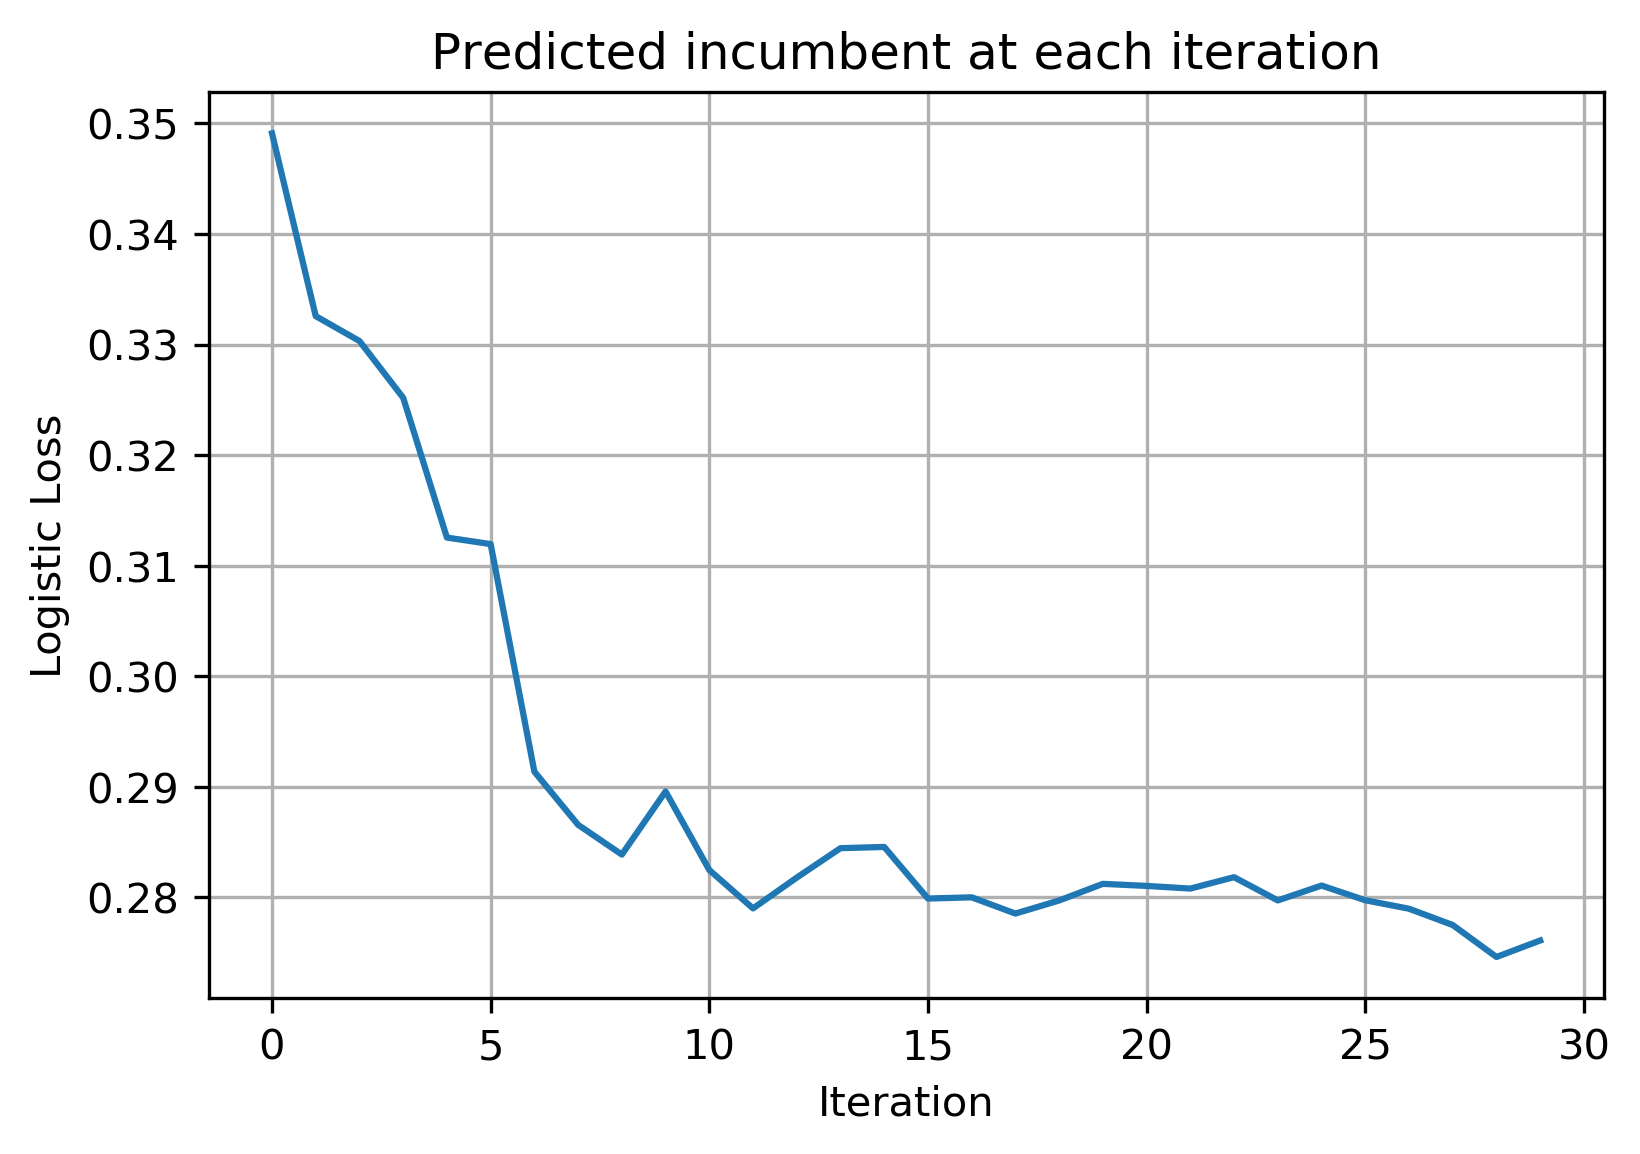

In [6]:
plt.figure()
plt.plot(opt.y_inc) # plot predicted incumbent value at each iteration
plt.xlabel('Iteration')
plt.ylabel('Logistic Loss')
plt.title('Predicted incumbent at each iteration')
plt.grid()
plt.show()

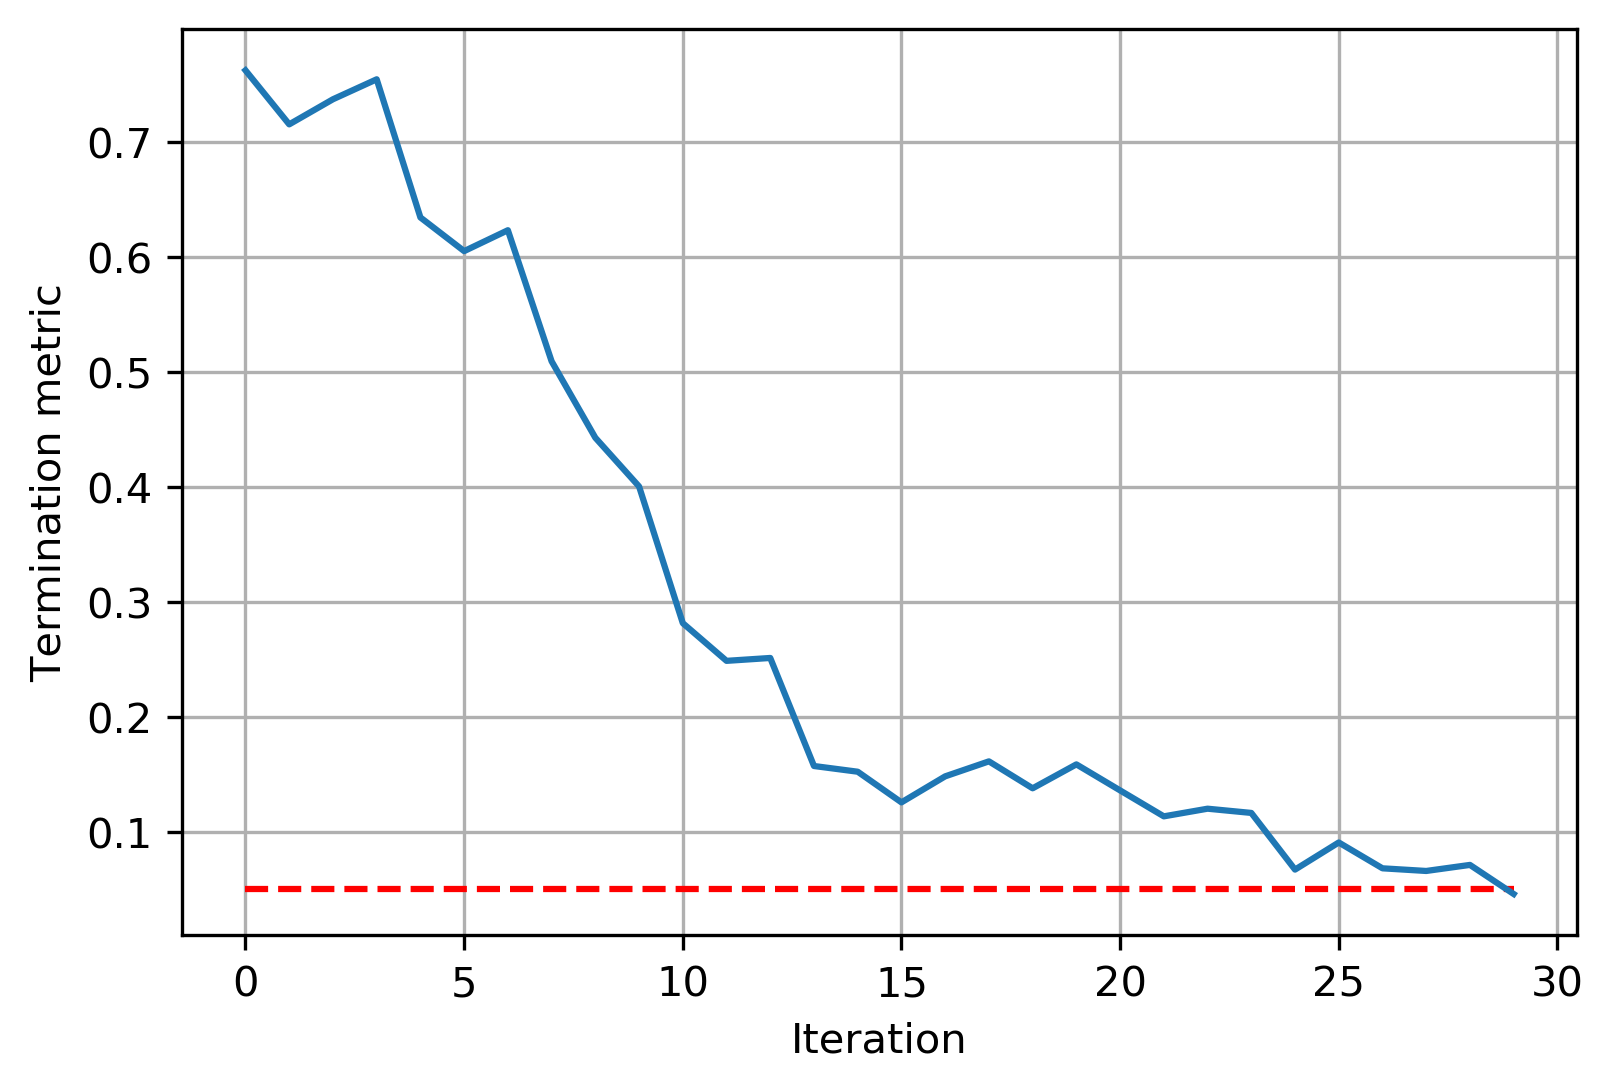

In [7]:
# plotting termination metric
plt.figure()
plt.hlines(0.05,0,opt.max_iter-1,
           linestyles="dashed",colors="red")
plt.plot(opt.term_crit())
plt.xlabel('Iteration')
plt.ylabel('Termination metric')
plt.grid()
plt.show()